In [1]:
import pandas as pd

#df = pd.read_csv('/Users/jan/Desktop/Promotion/python_class/testbook/data/BankChurners_mod2.csv')

df = pd.read_csv('https://www.dropbox.com/s/sbqezclbr7qkx5r/BankChurners_mod.csv?dl=1', index_col=0)
print(df.head(3))

   CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   

   Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
0              39                         5                       1   
1              44                         6                       1   
2              36                         4                       1   

   Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0                      3       12691.0                  777          11914.0 

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10127 entries, 0 to 10126
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

<BarContainer object of 4 artists>

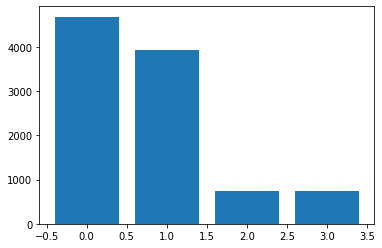

In [3]:
import matplotlib.pyplot as plt

plt.bar(range(len(df.Marital_Status.unique())), df.Marital_Status.value_counts())  #create object

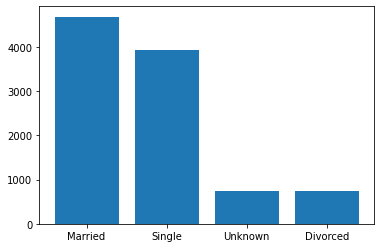

In [4]:
plt.bar(range(len(df.Marital_Status.unique())), df.Marital_Status.value_counts(),
        tick_label= df.Marital_Status.unique())    # modify tick labels 
plt.show()    # show image

samples in bin: [6735. 1520.  706.  413.  753.] 
bin borders: [ 1438.3   8053.84 14669.38 21284.92 27900.46 34516.  ]
patches: Rectangle(xy=(1934.47, 0), width=5623.21, height=6735, angle=0) Rectangle(xy=(8550.01, 0), width=5623.21, height=1520, angle=0)


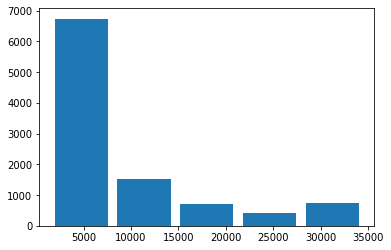

In [5]:
n, bins, patches = plt.hist(df.Credit_Limit, bins=5, rwidth=.85)
print('samples in bin:', n, '\nbin borders:', bins)
print('patches:', patches[0], patches[1])

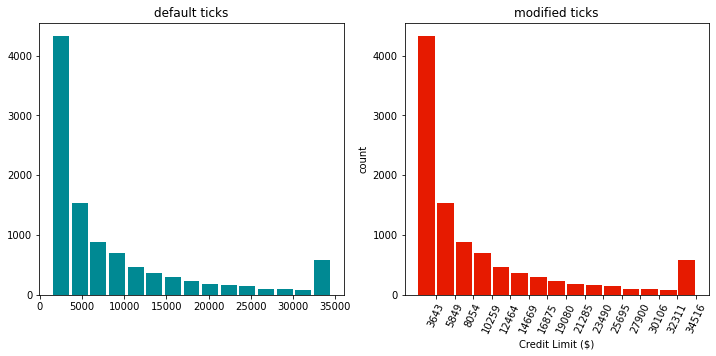

In [6]:
plt.figure(figsize=(12,5))    # this will stretch/compress the plots to fit the figsize

plt.subplot(1,2,1)    # first subplot of two in one row
plt.hist(df.Credit_Limit, bins=15, rwidth=.85, color=(0,137/255,147/255))
plt.title('default ticks')    # add title

plt.subplot(1,2,2)    # second subplot
n, bins,_ = plt.hist(df.Credit_Limit, bins=15, rwidth=.90, color=(.9,.1,0,1))
plt.title('modified ticks')

plt.ylabel('count')
plt.xlabel('Credit Limit ($)')
plt.xticks(ticks=bins[1:], rotation=65)    # set xticks at bin border

plt.show()   # only after all sunplots have been defined

In [7]:
import numpy as np
print(np.clip([-1,2,3,4,11,100], 3, 4))    # the list values are clipped to 3 and 4, respectively

[3 3 3 4 4 4]


In [8]:
(df.Income_Category.unique())    # get unique values to biuld dict in next step

array(['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K',
       '$120K +', 'Unknown'], dtype=object)

In [9]:
map_income = {'Unknown': 0, 'Less than $40K':1, '$40K - $60K':2, '$60K - $80K':3, '$80K - $120K':4, '$120K +':5}

print(pd.concat( [df.Income_Category[:3], df.Income_Category[:3].map(map_income)], axis=1))

   Income_Category  Income_Category
0      $60K - $80K                3
1   Less than $40K                1
2     $80K - $120K                4


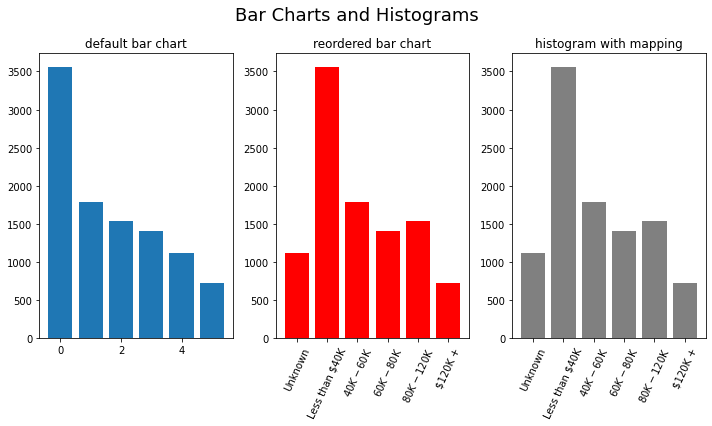

In [10]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(10,6))     # unpacking into figure and 2 axes objects

fig.suptitle('Bar Charts and Histograms', fontsize=18)

ax1.bar(range(len(df.Income_Category.unique())), height=df.Income_Category.value_counts())
ax1.title.set_text('default bar chart')

ax2.bar([k for k,v in map_income.items()], color='red', 
        height=[df.Income_Category.value_counts()[k]
                for k,v in map_income.items()],)    # unpack keys as labels, note that a list would suffice here
ax2.title.set_text('reordered bar chart') 
ax2.set_xticks(range(6))    # warning if not specified before the labels
ax2.set_xticklabels([k for k,v in map_income.items()], rotation=65)

n, bins, _ = ax3.hist(df.Income_Category.map(map_income), bins=6, rwidth=.8, color='grey')
bin_width = (bins[1] - bins[0])/2    # calculate half bin width for centered tickmarks
ax3.set_xticks(bins[:-1]+bin_width)  
ax3.set_xticklabels([k for k,v in map_income.items()], rotation=65) # unpack keys as labels
ax3.title.set_text('histogram with mapping')

plt.tight_layout()    # rearrange subplots for a better look
plt.show()

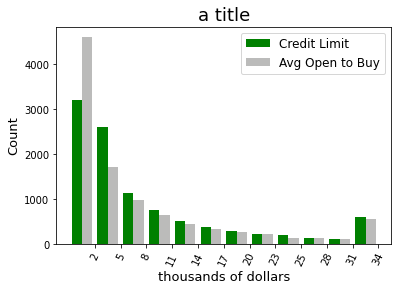

In [11]:
fig, ax = plt.subplots(figsize=(6,4))     # unpacking into figure and 2 axes objects

n, bins, _ = ax.hist([df.Credit_Limit, df.Avg_Open_To_Buy], bins=12, rwidth=.8, 
                     color=['green', (142/255,142/255, 141/255, .6)])
bin_width = (bins[1] - bins[0])/2    # calculate half bin width for centered tickmarks
ax.set_xticks(bins[1:])  
ax.set_xticklabels([int(b/1000) for b in bins[1:]], rotation=65) 
ax.title.set_text('a title')
ax.title.set_fontsize(18)
ax.legend(['Credit Limit', 'Avg Open to Buy'], fontsize='large')
ax.set_xlabel('thousands of dollars', fontsize = 13)
ax.set_ylabel('Count', fontsize = 13)

plt.show()

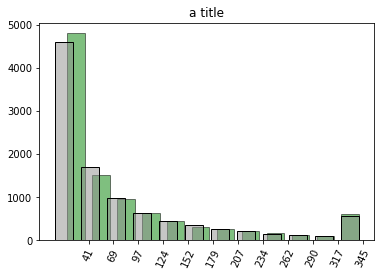

In [12]:
n, bins, _ = plt.hist([df.Credit_Limit], bins=12, rwidth=.7, color=['green'], alpha=.5, edgecolor='black')
bin_width = (bins[1] - bins[0])/2    # calculate half bin width for centered tickmarks
plt.xticks(bins[1:], [int(b/100) for b in bins[1:]], rotation=65) 

n, bins1, _ = plt.hist([df.Avg_Open_To_Buy], bins=12, rwidth=.7, 
                     color=[(142/255,142/255, 141/255, .5)], edgecolor='black')

plt.title('a title')
plt.show()

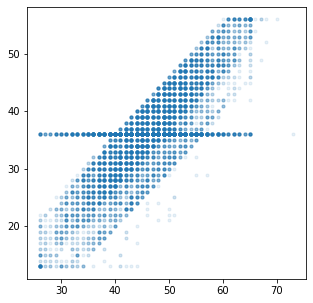

In [13]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(df.Customer_Age, df.Months_on_book, marker='.', alpha=.1)
plt.show()

In [14]:
print(np.corrcoef(df.Customer_Age, df.Months_on_book)[0][1])

0.7889123589930522


In [15]:
print(df.Months_on_book.value_counts()[:3])    # no surprise, it is the most frequent number for this variable

36    2463
37     358
34     353
Name: Months_on_book, dtype: int64


In [16]:
print('mean of whole dataset:', df.Months_on_book.mean())
print('mean without 36 months at all:',df[df.Months_on_book!=36].Months_on_book.mean())

mean of whole dataset: 35.928409203120374
mean without 36 months at all: 35.905401878914404


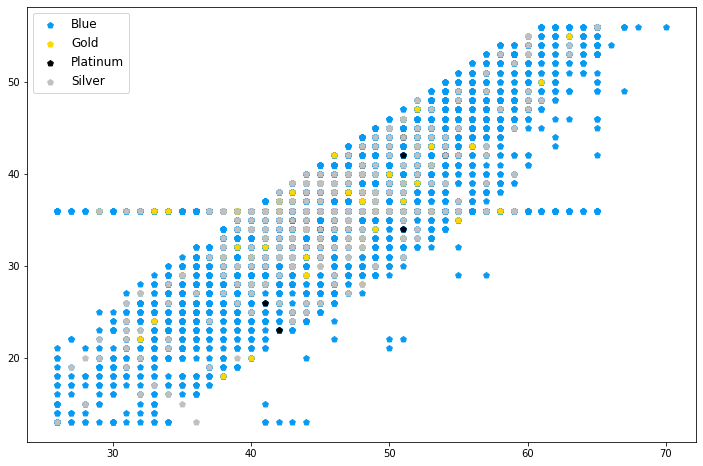

In [17]:
fig, ax = plt.subplots(figsize=(12,8))
#ax.scatter(df.Customer_Age, df.Months_on_book, marker='.', alpha=.1, c=df.Marital_Status.unique())

# use only rows in upper half of total revolving balance for less data points
groups = df[df.Total_Revolving_Bal > df.Total_Revolving_Bal.mean()].groupby(df.Card_Category)

# dictionary with 
card_col = {'Blue': '#069AF3', 'Gold': 'gold', 'Platinum': 'black', 'Silver': 'silver'}

# loop over the groups to create axes objects
for name, group in groups:
    ax.scatter(group.Customer_Age, group.Months_on_book, marker='p', alpha=1, label=name, color=card_col[name])
ax.legend(prop={'size': 12})

#show in same pot
plt.show()

In [18]:
for name, group in groups:
    print(card_col[name])

#069AF3
gold
black
silver


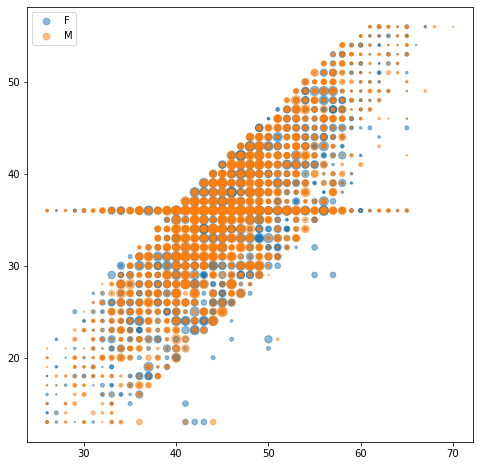

In [19]:
fig, ax = plt.subplots(figsize=(8,8))

# use only rows in upper half of total revolving balance for less data points
groups = df[df.Total_Revolving_Bal > df.Total_Revolving_Bal.mean()].groupby(df.Gender)

# loop over the (two) groups to create axes objects
# make marker size according to fourth variable
for name, group in groups:
    ax.scatter(group.Customer_Age, group.Months_on_book, marker='.', alpha=.5, label=name,
               s=(group.Dependent_count+2)**3)   # resizing might be necessary
ax.legend()

#show in same pot

plt.show()

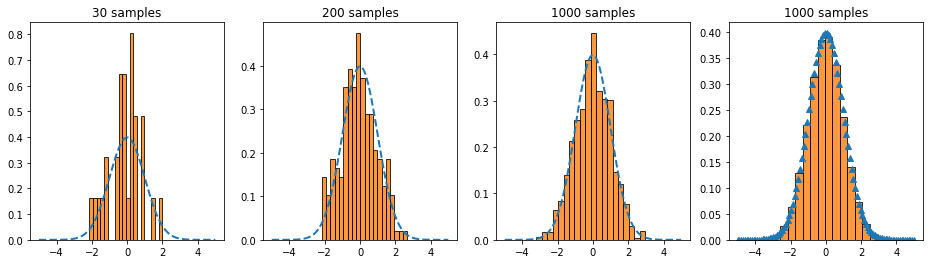

In [20]:
# define function for plotting
def my_gauss(x, mu, sig):
    return (1/(sig * np.sqrt(2* np.pi))) * np.exp(-.5 * ((x-mu)/sig)**2)
    
# define x values
x = np.linspace(-5,5, 100)

# y values
y = my_gauss(x, 0 ,1)

# draw random numbers from standard normal
my_rands = np.random.normal(0,1,100000)
 
samples= [30, 200, 1000]

plt.figure(figsize=(16,4))

for i,s in enumerate(samples):
    plt.subplot(1,4,i+1)
    plt.plot(x,y, linestyle='--', lw=2)
    plt.hist(my_rands[:s], bottom=0, bins=20, density=True, alpha=.8, edgecolor='black')
    plt.title(f'{s} samples')
    
plt.subplot(1,4,4)
plt.plot(x,y, marker='^', ls='')
plt.hist(my_rands, bottom=0, bins=20, density=True, alpha=.8, edgecolor='black')
plt.title(f'{s} samples')
plt.show()

In [21]:
import seaborn as sns

In [22]:
# and matplotlib
import matplotlib.pyplot as plt

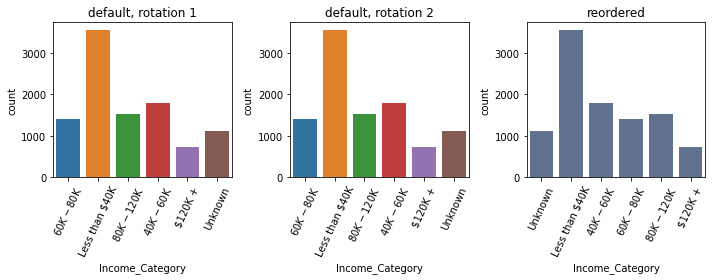

In [23]:
plt.figure(figsize=(10,4))
plt.subplot(1,3,1)
sns.countplot(x = 'Income_Category', data = df)
plt.xticks(rotation=65)
plt.title('default, rotation 1')

plt.subplot(1,3,2)
ctplot = sns.countplot(x = 'Income_Category', data = df)
for item in ctplot.get_xticklabels():
    item.set_rotation(65)
ctplot.set_xticklabels
plt.title('default, rotation 2')
    
plt.subplot(1,3,3)
order = ['Unknown', 'Less than $40K', '$40K - $60K', '$60K - $80K', '$80K - $120K', '$120K +']
color = (.35, .44 , .6)
new = sns.countplot(x = 'Income_Category', data = df, order=order, color=color)
plt.xticks(rotation=65)
plt.title('reordered')

plt.tight_layout()

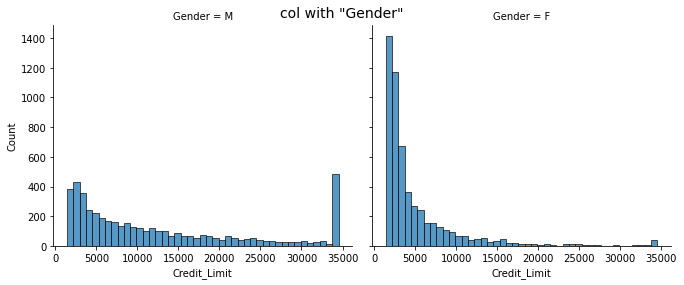

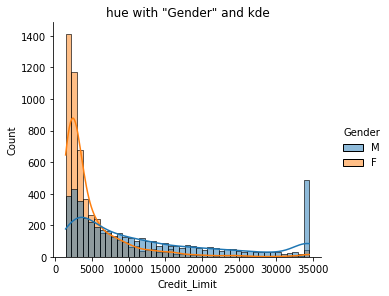

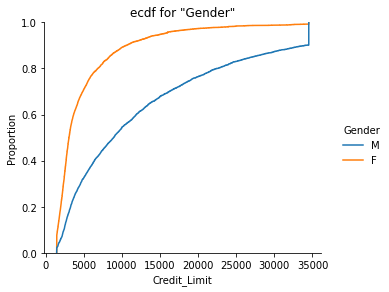

In [24]:
sns.displot(data=df, x="Credit_Limit", col="Gender", kind='hist', height=4, aspect=1.2)
plt.suptitle('col with "Gender"', fontsize=14)    # use suptitle, as subplots are automatically created

sns.displot(data=df, x="Credit_Limit", hue="Gender", kde=True, height=4, aspect=1.2)
plt.title('hue with "Gender" and kde')

sns.displot(data=df, x="Credit_Limit", hue="Gender", kind='ecdf', height=4, aspect=1.2)
plt.title('ecdf for "Gender"')
plt.show()

In [25]:
corr_df = df.select_dtypes('int64') .drop('CLIENTNUM', axis=1)   # select only numerical variables
                                                                 # exclude system variable
corr_mat = corr_df.corr()    # create correlation matrix
corr_mat    # not using the print statement makes it more pretty thanks to jupyter

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Revolving_Bal
Customer_Age,1.000000,-0.122254,0.788912,-0.010931,0.054361,-0.018452,0.014780
Dependent_count,-0.122254,1.000000,-0.103062,-0.039076,-0.010768,-0.040505,-0.002688
Months_on_book,0.788912,-0.103062,1.000000,-0.009203,0.074164,-0.010774,0.008623
Total_Relationship_Count,-0.010931,-0.039076,-0.009203,1.000000,-0.003675,0.055203,0.013726
Months_Inactive_12_mon,0.054361,-0.010768,0.074164,-0.003675,1.000000,0.029493,-0.042210
Contacts_Count_12_mon,-0.018452,-0.040505,-0.010774,0.055203,0.029493,1.000000,-0.053913
Total_Revolving_Bal,0.014780,-0.002688,0.008623,0.013726,-0.042210,-0.053913,1.000000


<AxesSubplot:>

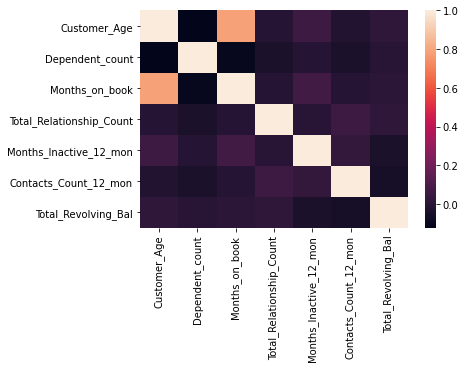

In [26]:
sns.heatmap(corr_mat)

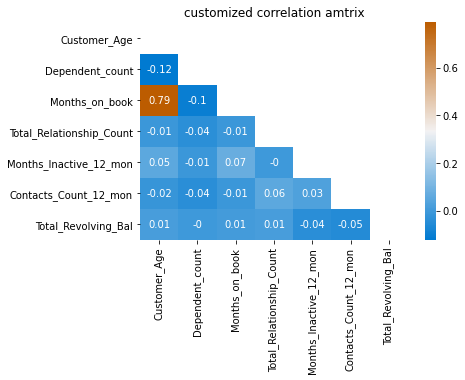

In [27]:
# create mask
mask = np.triu(np.ones_like(corr_mat))

# create custom colour bar
cmap = sns.diverging_palette(250, 390, l=50, s=100, as_cmap=True)

sns.heatmap(corr_mat, annot= np.round(corr_mat,2), mask=mask, cmap=cmap)
plt.title('customized correlation amtrix')
plt.show()

In [28]:
cmap = sns.choose_diverging_palette(as_cmap=False)

interactive(children=(IntSlider(value=220, description='h_neg', max=359), IntSlider(value=10, description='h_p…

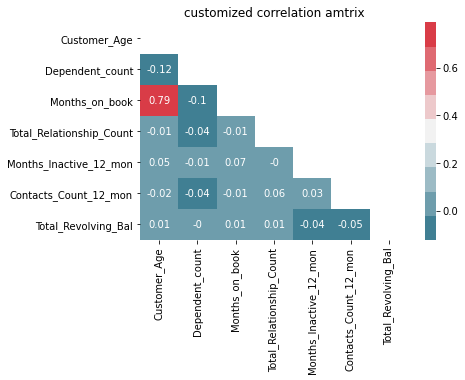

In [29]:
sns.heatmap(corr_mat, annot= np.round(corr_mat,2), mask=mask, cmap=cmap)
plt.title('customized correlation amtrix')
plt.show()

Text(0.17, 1438.3, '$min$')

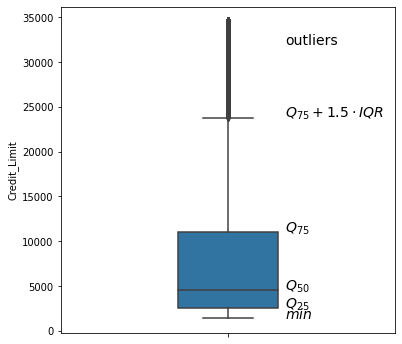

In [30]:
plt.figure(figsize=(6,6))
x_val = .17
sns.boxplot(y=df.Credit_Limit, whis=1.5, width=.3)
plt.text(x_val,32e3,'outliers', fontsize=14)
# interquartile range
iqr = np.quantile(df.Credit_Limit, .75) - np.quantile(df.Credit_Limit, 0.25)

# upper whisker -> max value inside (Q_75 + 1.5 IQR)
plt.text(x_val,np.quantile(df.Credit_Limit,.75)+1.5*iqr,'$Q_{75}+1.5 \cdot IQR$', fontsize=14)

# Quartile
plt.text(x_val,np.quantile(df.Credit_Limit, .75),'$Q_{75}$', fontsize=14)
plt.text(x_val,np.median(df.Credit_Limit),'$Q_{50}$', fontsize=14)
plt.text(x_val,np.quantile(df.Credit_Limit, .25),'$Q_{25}$', fontsize=14)

# lower whisker -> min value inside (Q_25 - 1.5 IQR)
plt.text(x_val,max(np.quantile(df.Credit_Limit,.25)-1.5*iqr, min(df.Credit_Limit)),'$min$', fontsize=14)

<AxesSubplot:>

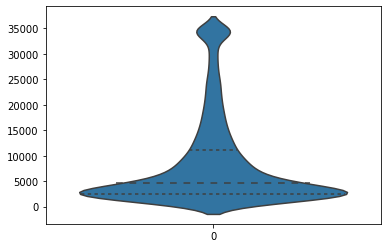

In [31]:
sns.violinplot(data=df.Credit_Limit, inner="quartile")

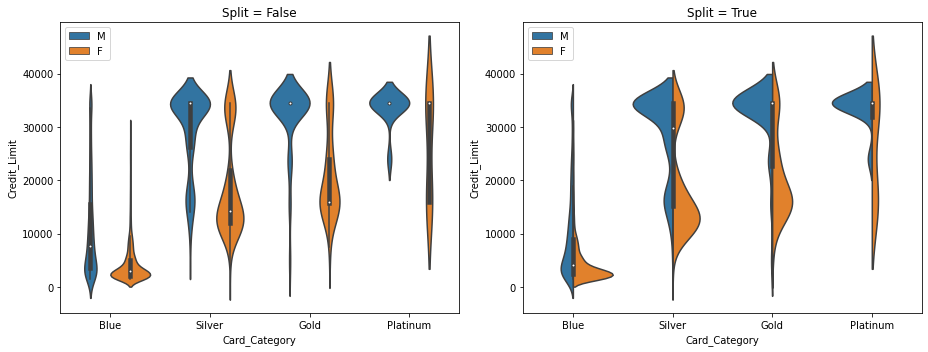

In [32]:

plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
sns.violinplot(data=df, y='Credit_Limit', x='Card_Category', hue = 'Gender', split = False,
               order=['Blue', 'Silver', 'Gold', 'Platinum'])
plt.legend(loc=2)
plt.title('Split = False')
plt.subplot(1,2,2)
sns.violinplot(data=df, y='Credit_Limit', x='Card_Category', hue = 'Gender', split = True,
               order=['Blue', 'Silver', 'Gold', 'Platinum'])
plt.legend(loc=2)
plt.title('Split = True')

plt.tight_layout()

plt.show()
